# Polynomial fit

**Dataset description**: Fertilized corn crop in Nebraska.

Corn Trial conducted jointly with Dennis Francis and Jim Schepers, USDA-ARS, University of Nebraska, Lincoln, NE.  Corn trial located near Shelton, NE. Harvested in October, 2003

Summary:  Using the maximum yield Nitrogen Fertilization Optimization Algorithm (NFOA), grain yields were increased by 4 bu/ac when compared to the 80-85 N split (treatment 10 versus 4).  For treatment 10 and treatment 4, 80 lb of N /ac was applied at a fixed rate preplant.  When topdress N was applied on June 17, 2003, fixed rates were applied in treatments 2, 3, and 4.  Treatments 7-11 received topdress N applied using the variable N rate applicator (illustrated below) capable of sensing and treating each corn plant individually.  Grain yields were increased by 4 bu/ac for treatment 10 when compared to treatment 4, using 42 less lb N/ac.  As a result, the nitrogen use efficiencies of this treatment were 10% better than the split N treatment (treatment 10 vs 4, 40% NUE, and 30% NUE, respectively).

Source: <http://www.nue.okstate.edu/Nitrogen_Conference2003/Corn_Research.htm>

In [94]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [95]:
# Fit polynomial: Example using yield responses to nitrogen rates
corn_yield_obs = [118,165,170,193,180,181,141,177,165,197,175]
nitrogen_rate =  [0,89,161,165,80,160,37,105,69,123,141]


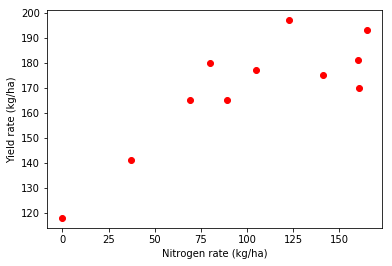

In [96]:
plt.figure()
plt.plot(nitrogen_rate,corn_yield_obs,'or',label='observed data')
plt.xlabel('Nitrogen rate (kg/ha)')
plt.ylabel('Yield rate (kg/ha)')
plt.show()

In [97]:
par = np.polyfit(nitrogen_rate, corn_yield_obs, 2)
print(par)

#par = np.polyfit(nitrogen_rate, obs_corn_yield, 2, full=True)
# When it is False (the default) just the coefficients are returned, when True diagnostic information 
# from the singular value decomposition is also returned.

[-3.41221057e-03  9.61329119e-01  1.15569115e+02]


In [98]:
# Create object that you can call to run the polynomial with the fitted coefficients
polyfun = np.poly1d(par) # Create objec
print(polyfun) # polynomial function


           2
-0.003412 x + 0.9613 x + 115.6


In [23]:
# Compute fitting error
corn_yield_pred = polyfun(nitrogen_rate);
rmse = np.sqrt(np.mean((corn_yield_obs - corn_yield_pred)**2))
print(round(rmse,1),'kg/ha')

8.4 kg/ha


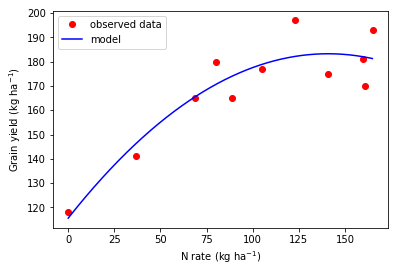

In [76]:
# Plot
#x_range = range(np.min(nitrogen_rate),np.max(nitrogen_rate),1)
nitrogen_rate_pred = np.arange(np.min(nitrogen_rate),np.max(nitrogen_rate),0.1)
corn_yield_pred = polyfun(x_range)
plt.figure()
plt.plot(nitrogen_rate, corn_yield_obs, 'or', label='observed data')
plt.plot(nitrogen_rate_pred, corn_yield_pred, '-b', label='model')
plt.xlabel('N rate (kg $\mathregular{ha^{-1}}$)')
plt.ylabel('Grain yield (kg $\mathregular{ha^{-1}}$)')
plt.legend()
plt.show()

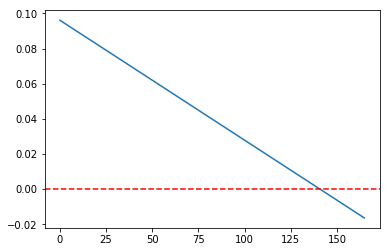

In [84]:
first_derivative = np.diff(corn_yield_pred,n=1) # One value shorter

plt.figure()
plt.plot(nitrogen_rate_pred[:-1], first_derivative)
plt.axhline(0, color='r', linestyle='--')
plt.show()

In [87]:
idx_lowest_derivative = np.argmin(np.abs(first_derivative))
opt_nitrogen_rate = nitrogen_rate_pred[idx_lowest_derivative]
print(opt_nitrogen_rate )

140.8


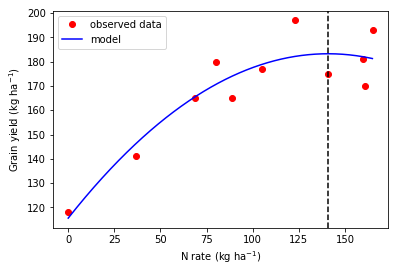

In [82]:
plt.figure()
plt.plot(nitrogen_rate, corn_yield_obs, 'or', label='observed data')
plt.plot(nitrogen_rate_pred, corn_yield_pred, '-b', label='model')
plt.axvline(opt_nitrogen_rate, color='k', linestyle='--')
plt.xlabel('N rate (kg $\mathregular{ha^{-1}}$)')
plt.ylabel('Grain yield (kg $\mathregular{ha^{-1}}$)')
plt.legend()
plt.show()